In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import ticker
import lmfit as lm
import scipy as sp
import corner
import emcee
import math
import pandas as pd
from lc_lmfit import *

In [2]:
folder='data/'
filename='_LC_log.txt'

FXRTs=['FXRT_1','FXRT_2','FXRT_3','FXRT_4','FXRT_5','FXRT_6','FXRT_7',
      'FXRT_8','FXRT_9','FXRT_10','FXRT_11','FXRT_12','FXRT_13','FXRT_14',
      'FXRT_15','FXRT_16','FXRT_17','FXRT_18','FXRT_19','FXRT_20','FXRT_21','FXRT_22']

jonathan_fits = {
    "FXRT_1": [],
    "FXRT_2": [5.9e3, 0.04, 1.7, 3.6e-14],
    "FXRT_3": [1.5e3, -0.1, 0.8, 1.9e-14],
    "FXRT_4": [],
    "FXRT_5": [],
    "FXRT_6": [0.3, 4.8e-14],
    "FXRT_7": [1.1e3, -0.2, 1.6, 1.4e-12],
    "FXRT_8": [23.8e3, -0.2, 2.0, 5.6e-15],
    "FXRT_9": [5.3e3, -0.2, 2.8, 1.8e-14],
    "FXRT_10": [2.7e3, -0.0, 2.4, 2.0e-14],
    "FXRT_11": [],
    "FXRT_12": [1.8e3, -0.0, 1.9, 2.0e-13],
    "FXRT_13": [0.2, 3.3e-14],
    "FXRT_14": [0.2e3, -0.4, 1.6, 8.2e-13],
    "FXRT_15": [3.7e3, -0.4, 2.9, 6.8e-14],
    "FXRT_16": [2.2e3, 0.09, 2.0, 4.1e-13],
    "FXRT_17": [0.3, 8.6e-13],
    "FXRT_18": [0.5, 4.6e-11],
    "FXRT_19": [2.1e3, 0.1, 1.9, 5.5e-13],
    "FXRT_20": [0.1e3, -1.0, 2.5, 4.2e-12],
    "FXRT_21": [0.4, 1.1e-12],
    "FXRT_22": [4.4e3, 0.2, 3.8, 3.2e-13]
}

refit_params = {}


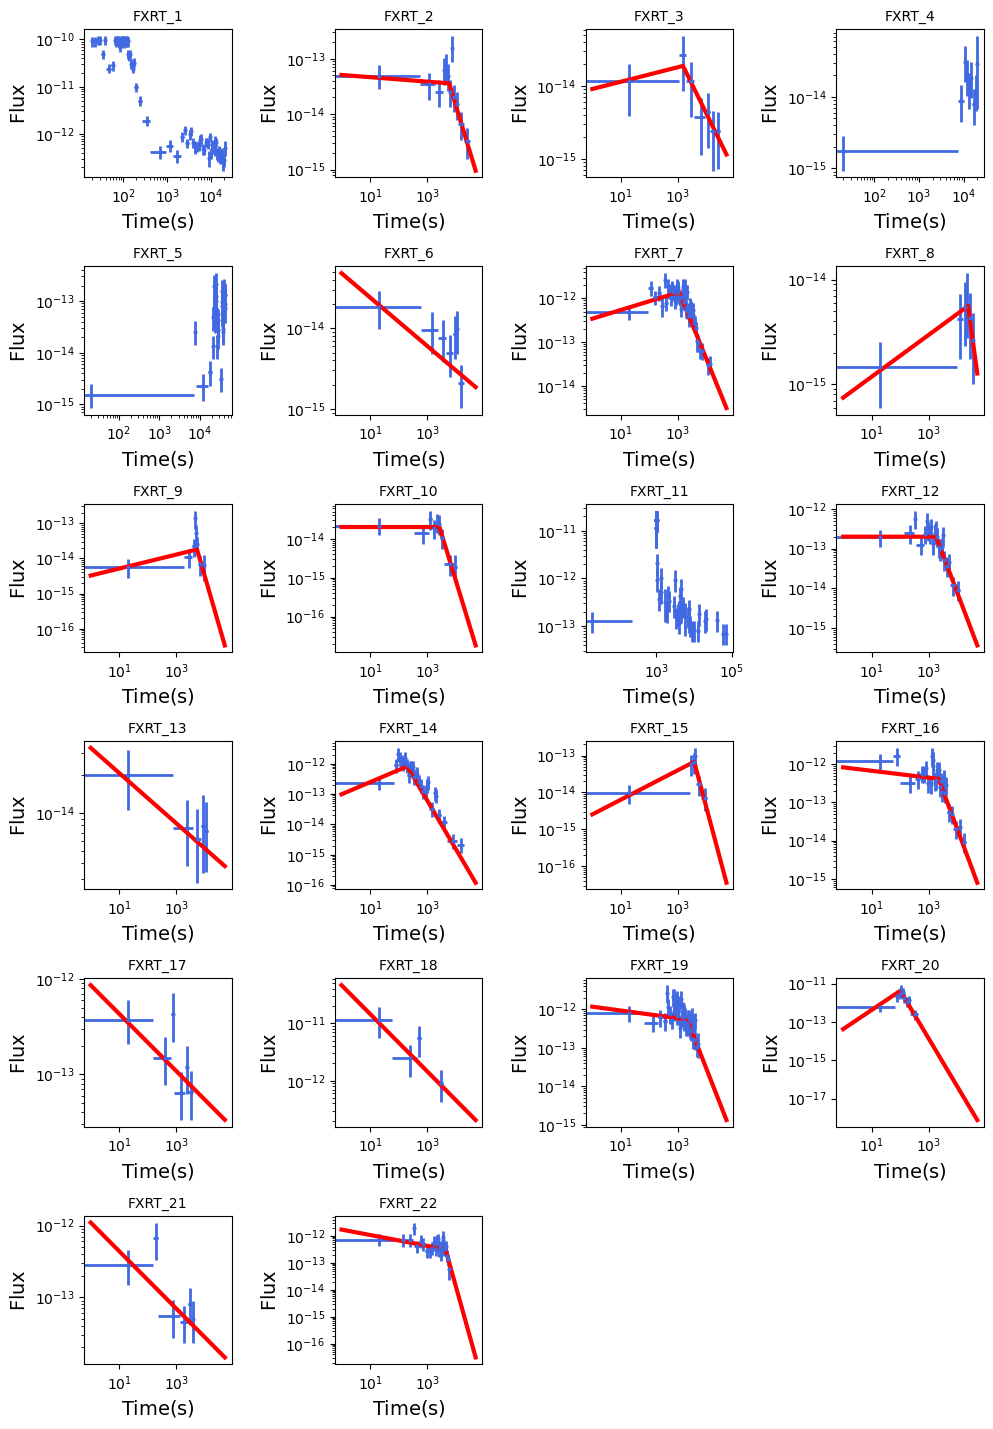

<Figure size 640x480 with 0 Axes>

In [3]:
fig=plt.figure(figsize=(10.0,15.0), dpi=100)
fig.patch.set_facecolor('white')
plt.subplots_adjust(top=0.96, bottom=0.07, left=0.07, right=0.97, hspace=0.6,wspace=0.7)

for i in range(len(FXRTs)):
    ax1 = fig.add_subplot(6, 4, i+1)
    Time,Flux,Time_low,Time_high,Flux_low,Flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
    ax1.errorbar(Time,Flux,xerr=[Time_low,Time_high],yerr=[Flux_low,Flux_high],fmt='.',color='royalblue',linewidth=2.0,markersize=4.0)
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    #ax1.set_xlim(1e1,1e5)
    #ax1.set_ylim(1e-14,1e-9)
    ax1.set_xlabel('$\mathrm{Time(s)}$',fontsize=14.)
    ax1.set_ylabel('$\mathrm{Flux}$',fontsize=14.)
    ax1.set_title(FXRTs[i],fontsize=10)
    x=np.arange(1,5e4,10)
    param = jonathan_fits[FXRTs[i]]
    if len(jonathan_fits[FXRTs[i]])==4:
        ax1.plot(x,broken_power_law(x, *param),color='r',linewidth=3.0,label='$\mathrm{BPL}$',zorder=2.0)
    elif len(jonathan_fits[FXRTs[i]])==2:
        ax1.plot(x,power_law(x,*param),color='r',linewidth=3.0,label='$\mathrm{BPL}$',zorder=2.0)


plt.show()
plt.subplots_adjust(top=0.96, bottom=0.07, left=0.07, right=0.97, hspace=0.6,wspace=0.9)

### FXRT 12, i=11

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 80
    # data points      = 21
    # variables        = 4
    chi-square         = 2.93666127
    reduced chi-square = 0.17274478
    Akaike info crit   = -33.3122316
    Bayesian info crit = -29.1341419
[[Variables]]
    t_break:    1356.99904 +/- 269.604273 (19.87%) (init = 1000)
    alpha_1:   -0.05650791 +/- 0.12788000 (226.30%) (init = 0.5)
    alpha_2:    1.56076994 +/- 0.23767789 (15.23%) (init = 4)
    amplitude:  2.2409e-13 +/- 4.9065e-14 (21.90%) (init = 1e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.7107
    C(t_break, amplitude) = -0.6794
    C(t_break, alpha_2)   = +0.5495
    C(t_break, alpha_1)   = +0.5018


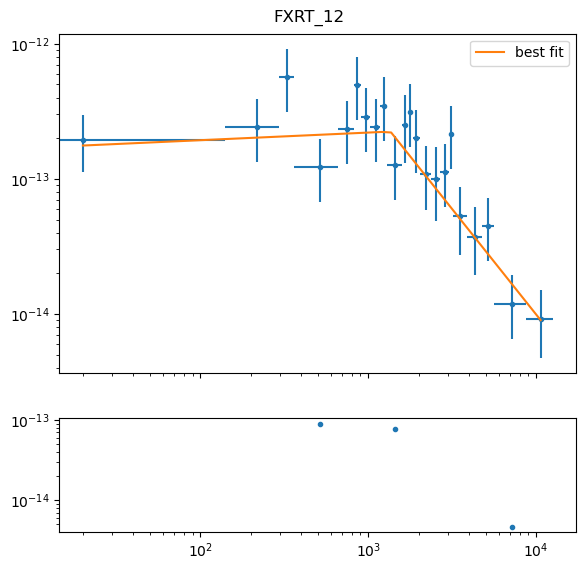

20.0 241.85946261882782


name,value,standard error,relative error,initial value,min,max,vary
t_break,1356.99904,269.604273,(19.87%),1000,800.000000,1500.00000,True
alpha_1,-0.05650791,0.12788000,(226.30%),0.5,-5.00000000,5.00000000,True
alpha_2,1.56076994,0.23767789,(15.23%),4,1.00000000,10.0000000,True
amplitude,2.2409e-13,4.9065e-14,(21.90%),1e-12,1.0000e-13,1.0000e-11,True


In [4]:
i=11
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)

flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 0)[0][0]
fit_end_index = np.where(time < 2e4)[0][-1]

params=lm.Parameters()
params.add("t_break", min = 800, max = 1500, value = 1000)
params.add("alpha_1", min = -5, max = 5.0, value = 0.5)
params.add("alpha_2", min = 1, max = 10.0, value = 4)
params.add("amplitude", min = 1e-13, max = 1e-11, value = 1e-12)


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index]))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = broken_power_law(time[ee_start_index:fit_end_index], result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux[ee_start_index:fit_end_index]

x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y,label ='best fit', zorder=10)
# ax1.loglog(x,nbroken_law(x,[107], [0.5, 4], 1e-7),label ='guess')
ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[ee_start_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[ee_start_index]})

print(time[ee_start_index], time_err[ee_start_index])

result.params

### FXRT 13, i=12

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 36
    # data points      = 5
    # variables        = 2
    chi-square         = 0.04542538
    reduced chi-square = 0.01514179
    Akaike info crit   = -19.5056105
    Bayesian info crit = -20.2867347
[[Variables]]
    alpha_1:    0.17837996 +/- 0.02760037 (15.47%) (init = 0.2)
    amplitude:  3.3023e-14 +/- 6.9055e-15 (20.91%) (init = 3.3e-14)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = +0.9474


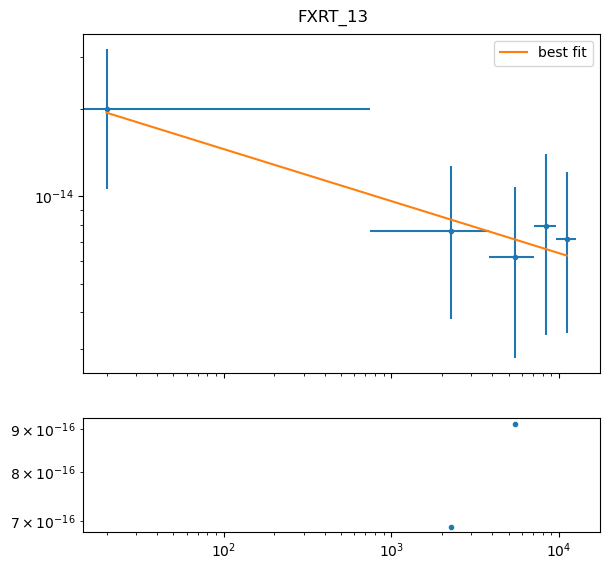

20.0 1457.4237303733826 0


name,value,standard error,relative error,initial value,min,max,vary
alpha_1,0.17837996,0.02760037,(15.47%),0.2,-1.00000000,5.00000000,True
amplitude,3.3023e-14,6.9055e-15,(20.91%),3.3e-14,1.0000e-16,1.0000e-12,True


In [5]:
i=12
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("alpha_1", min = -1, max = 5.0, value = jonathan_params[0])
params.add("amplitude", min = 1e-16, max = 1e-12, value = jonathan_params[1])


minner = lm.Minimizer(cost_func_pl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
alp1 = bfit["alpha_1"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = power_law(time, result.params['alpha_1'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = power_law(x, result.params['alpha_1'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT 14, i=13

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 45
    # data points      = 29
    # variables        = 4
    chi-square         = 3.34903621
    reduced chi-square = 0.13396145
    Akaike info crit   = -54.6000735
    Bayesian info crit = -49.1308902
[[Variables]]
    t_break:    129.275432 +/- 14.1342486 (10.93%) (init = 200)
    alpha_1:   -1.00677805 +/- 0.23674791 (23.52%) (init = -0.4)
    alpha_2:    1.43849127 +/- 0.06405066 (4.45%) (init = 1.6)
    amplitude:  1.5605e-12 +/- 2.2853e-13 (14.65%) (init = 8.2e-13)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.6082
    C(t_break, amplitude) = -0.5983
    C(t_break, alpha_1)   = +0.5664
    C(t_break, alpha_2)   = +0.3971
    C(alpha_2, amplitude) = +0.2985


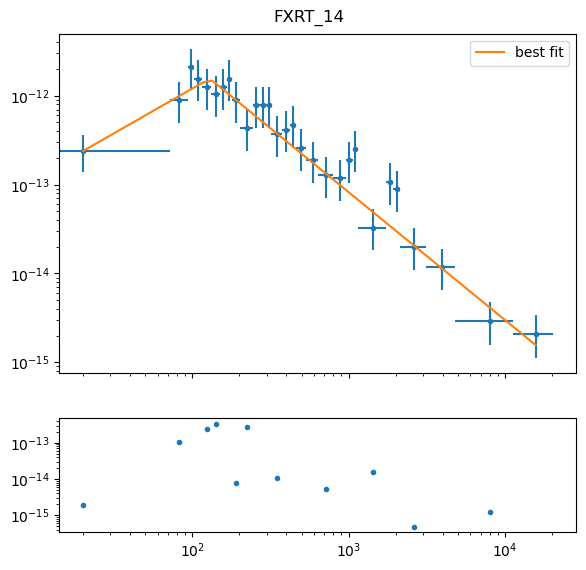

20.0 103.65380561351776 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,129.275432,14.1342486,(10.93%),200.0,80.0000000,1000.00000,True
alpha_1,-1.00677805,0.23674791,(23.52%),-0.4,-5.00000000,5.00000000,True
alpha_2,1.43849127,0.06405066,(4.45%),1.6,0.00000000,10.0000000,True
amplitude,1.5605e-12,2.2853e-13,(14.65%),8.2e-13,1.0000e-13,1.0000e-11,True


In [6]:
i=13
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 80, max = 1e3, value = jonathan_params[0])
params.add("alpha_1", min = -5, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-13, max = 1e-11, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[fit_index], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})

print(time[fit_index], time_err[fit_index], fit_index)
result.params

### FXRT 15, i=14

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 75
    # data points      = 5
    # variables        = 4
    chi-square         = 0.03980397
    reduced chi-square = 0.03980397
    Akaike info crit   = -16.1661330
    Bayesian info crit = -17.7283813
##  Warning: uncertainties could not be estimated:
    amplitude:  at initial value
    amplitude:  at boundary
[[Variables]]
    t_break:    4182.31311 +/-        nan (nan%) (init = 5000)
    alpha_1:   -0.38969161 +/- 0.04972409 (12.76%) (init = 0.5)
    alpha_2:    6.01945694 +/-        nan (nan%) (init = 2)
    amplitude:  7.7261e-14 +/-        nan (nan%) (init = 1e-13)


/Users/kruthik/opt/miniconda3/envs/fxt/lib/python3.11/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/kruthik/opt/miniconda3/envs/fxt/lib/python3.11/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


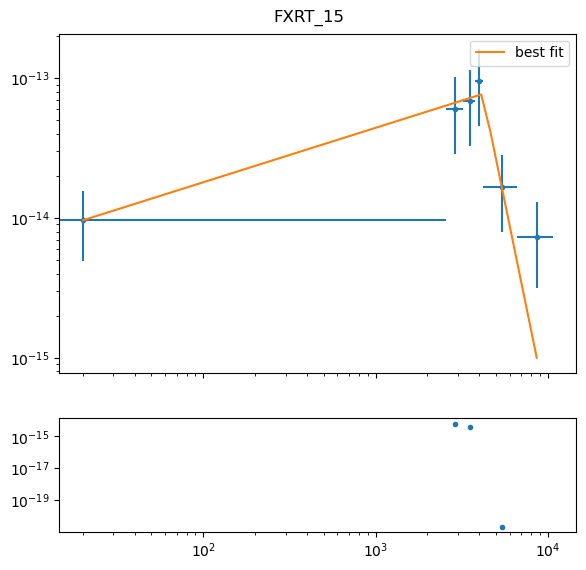

20.0 5094.744721233845 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,4182.31311,nan,(nan%),5000.0,1000.00000,20000.0000,True
alpha_1,-0.38969161,0.04972409,(12.76%),0.5,-5.00000000,5.00000000,True
alpha_2,6.01945694,nan,(nan%),2,0.00000000,8.00000000,True
amplitude,7.7261e-14,nan,(nan%),1e-13,1.0000e-14,1.0000e-12,True


In [7]:
i=14
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)

flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 0)[0][0]
fit_end_index = np.where(time < 2e4)[0][-1]

params=lm.Parameters()
params.add("t_break", min = 1e3, max = 2e4, value = 5e3)
params.add("alpha_1", min = -5, max = 5.0, value = 0.5)
params.add("alpha_2", min = 0, max = 8.0, value = 2)
params.add("amplitude", min = 1e-14, max = 1e-12, value = 1e-13)


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index]))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = broken_power_law(time[ee_start_index:fit_end_index], result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux[ee_start_index:fit_end_index]

x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y,label ='best fit', zorder=10)
# ax1.loglog(x,nbroken_law(x,[107], [0.5, 4], 1e-7),label ='guess')
ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[ee_start_index]}) 
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[ee_start_index]})

print(time[ee_start_index], time_err[ee_start_index], ee_start_index)

result.params

### FXRT 16, i=15

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 91
    # data points      = 29
    # variables        = 4
    chi-square         = 4.65986222
    reduced chi-square = 0.18639449
    Akaike info crit   = -45.0209885
    Bayesian info crit = -39.5518052
[[Variables]]
    t_break:    2276.02271 +/- 346.669540 (15.23%) (init = 1000)
    alpha_1:    0.09185764 +/- 0.12682633 (138.07%) (init = 0.5)
    alpha_2:    2.08615863 +/- 0.30757410 (14.74%) (init = 10)
    amplitude:  4.0247e-13 +/- 8.0218e-14 (19.93%) (init = 1e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.7638
    C(t_break, amplitude) = -0.6680
    C(t_break, alpha_2)   = +0.6204
    C(t_break, alpha_1)   = +0.4791


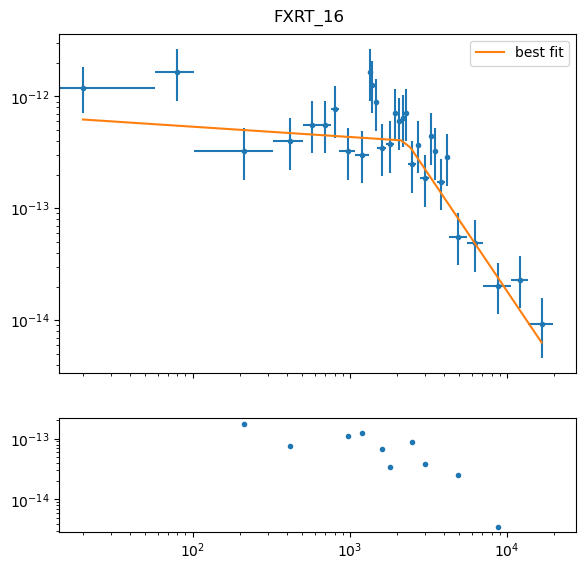

20.0 75.384064078331 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,2276.02271,346.669540,(15.23%),1000.0,100.000000,5000.00000,True
alpha_1,0.09185764,0.12682633,(138.07%),0.5,-5.00000000,10.0000000,True
alpha_2,2.08615863,0.30757410,(14.74%),10,0.00000000,20.0000000,True
amplitude,4.0247e-13,8.0218e-14,(19.93%),1e-12,1.0000e-13,1.0000e-11,True


In [8]:

i=15
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)

flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 0)[0][0]
fit_end_index = np.where(time < 2e4)[0][-1]

params=lm.Parameters()
params.add("t_break", min = 1e2, max = 5e3, value = 1e3)
params.add("alpha_1", min = -5, max = 10.0, value = 0.5)
params.add("alpha_2", min = 0, max = 20.0, value = 10)
params.add("amplitude", min = 1e-13, max = 1e-11, value =  1e-12)


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index]))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = broken_power_law(time[ee_start_index:fit_end_index], result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux[ee_start_index:fit_end_index]

x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y,label ='best fit', zorder=10)
# ax1.loglog(x,nbroken_law(x,[107], [0.5, 4], 1e-7),label ='guess')
ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[ee_start_index]}) #note the -1
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[ee_start_index]}) #note the -1


print(time[ee_start_index], time_err[ee_start_index], ee_start_index)

result.params

### FXRT = 17, i=16

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 30
    # data points      = 6
    # variables        = 2
    chi-square         = 0.64208516
    reduced chi-square = 0.16052129
    Akaike info crit   = -9.40876279
    Bayesian info crit = -9.82524385
[[Variables]]
    alpha_1:    0.34758935 +/- 0.10356282 (29.79%) (init = 0.3)
    amplitude:  1.0887e-12 +/- 7.3696e-13 (67.69%) (init = 8.6e-13)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = +0.9563


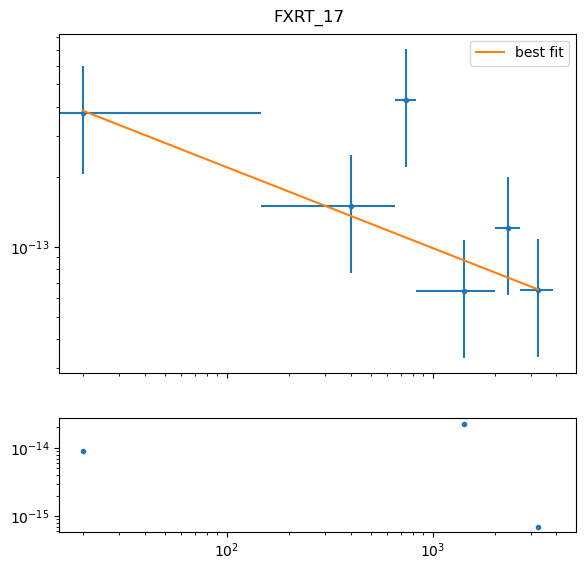

20.0 254.42447447776794 0


name,value,standard error,relative error,initial value,min,max,vary
alpha_1,0.34758935,0.10356282,(29.79%),0.3,-1.00000000,5.00000000,True
amplitude,1.0887e-12,7.3696e-13,(67.69%),8.6e-13,1.0000e-15,1.0000e-11,True


In [9]:
i=16
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("alpha_1", min = -1, max = 5.0, value = jonathan_params[0])
params.add("amplitude", min = 1e-15, max = 1e-11, value = jonathan_params[1])


minner = lm.Minimizer(cost_func_pl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
alp1 = bfit["alpha_1"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = power_law(time, result.params['alpha_1'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = power_law(x, result.params['alpha_1'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT = 18, i=17

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 15
    # data points      = 4
    # variables        = 2
    chi-square         = 0.30781381
    reduced chi-square = 0.15390691
    Akaike info crit   = -6.25821816
    Bayesian info crit = -7.48562944
[[Variables]]
    alpha_1:    0.49045024 +/- 0.13742431 (28.02%) (init = 0.5)
    amplitude:  4.6021e-11 +/- 3.7572e-11 (81.64%) (init = 4.6e-11)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = +0.9523


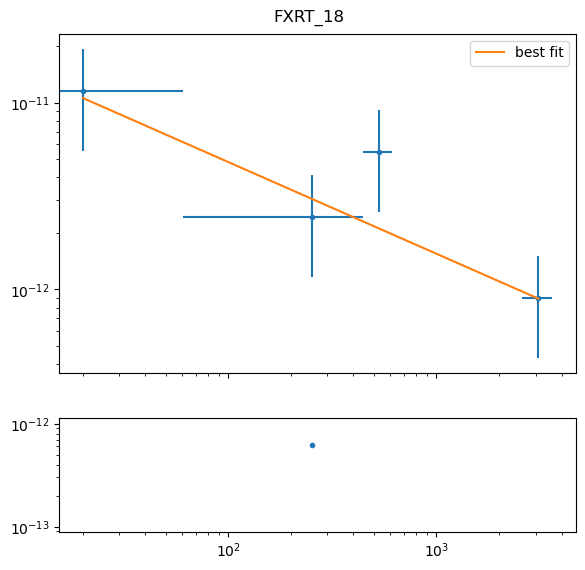

20.0 81.02624452114105 0


name,value,standard error,relative error,initial value,min,max,vary
alpha_1,0.49045024,0.13742431,(28.02%),0.5,-1.00000000,5.00000000,True
amplitude,4.6021e-11,3.7572e-11,(81.64%),4.6e-11,1.0000e-13,1.0000e-10,True


In [10]:
i=17
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("alpha_1", min = -1, max = 5.0, value = jonathan_params[0])
params.add("amplitude", min = 1e-13, max = 1e-10, value = jonathan_params[1])


minner = lm.Minimizer(cost_func_pl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
alp1 = bfit["alpha_1"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = power_law(time, result.params['alpha_1'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = power_law(x, result.params['alpha_1'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT 19, i=18

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 84
    # data points      = 41
    # variables        = 4
    chi-square         = 6.17999810
    reduced chi-square = 0.16702698
    Akaike info crit   = -69.5824182
    Bayesian info crit = -62.7281300
[[Variables]]
    t_break:    1601.52441 +/- 271.875876 (16.98%) (init = 2100)
    alpha_1:   -0.00876244 +/- 0.09682837 (1105.04%) (init = 0.1)
    alpha_2:    1.45352327 +/- 0.32076527 (22.07%) (init = 1.9)
    amplitude:  6.4937e-13 +/- 9.1391e-14 (14.07%) (init = 5.5e-13)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.7025
    C(t_break, alpha_2)   = +0.6951
    C(t_break, amplitude) = -0.5632
    C(t_break, alpha_1)   = +0.4007


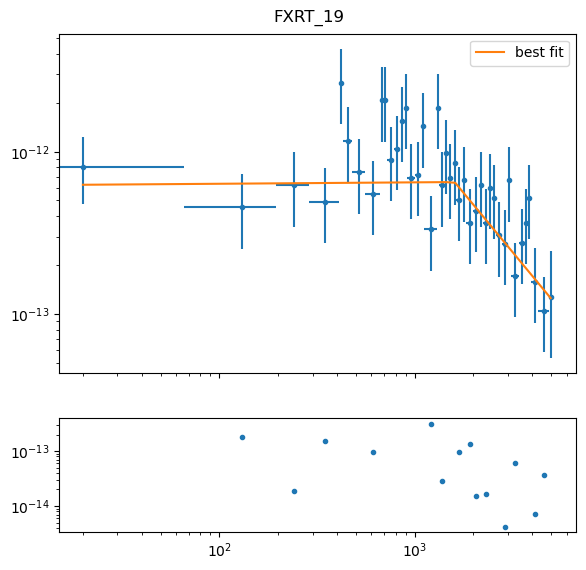

20.0 91.09076535701752 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,1601.52441,271.875876,(16.98%),2100.0,200.000000,5000.00000,True
alpha_1,-0.00876244,0.09682837,(1105.04%),0.1,-5.00000000,5.00000000,True
alpha_2,1.45352327,0.32076527,(22.07%),1.9,0.00000000,10.0000000,True
amplitude,6.4937e-13,9.1391e-14,(14.07%),5.5e-13,1.0000e-13,1.0000e-11,True


In [11]:
i=18
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 2e2, max = 5e3, value = jonathan_params[0])
params.add("alpha_1", min = -5, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-13, max = 1e-11, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT 20, i=19

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 35
    # data points      = 9
    # variables        = 4
    chi-square         = 0.28581330
    reduced chi-square = 0.05716266
    Akaike info crit   = -23.0467696
    Bayesian info crit = -22.2578713
[[Variables]]
    t_break:    113.058537 +/- 8.83202980 (7.81%) (init = 100)
    alpha_1:   -1.04672695 +/- 0.19741802 (18.86%) (init = -1)
    alpha_2:    2.50873736 +/- 0.35592863 (14.19%) (init = 2.5)
    amplitude:  3.6946e-12 +/- 5.3118e-13 (14.38%) (init = 4.2e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = -0.6223
    C(t_break, alpha_2)   = +0.5991
    C(t_break, alpha_1)   = +0.4566
    C(alpha_2, amplitude) = +0.3407
    C(t_break, amplitude) = -0.2829


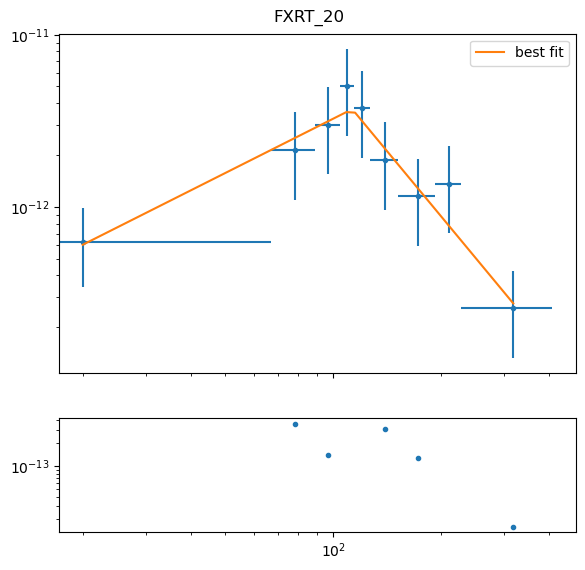

20.0 94.23012590408325 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,113.058537,8.83202980,(7.81%),100.0,50.0000000,500.000000,True
alpha_1,-1.04672695,0.19741802,(18.86%),-1.0,-5.00000000,5.00000000,True
alpha_2,2.50873736,0.35592863,(14.19%),2.5,0.00000000,10.0000000,True
amplitude,3.6946e-12,5.3118e-13,(14.38%),4.2e-12,1.0000e-13,1.0000e-11,True


In [12]:
i=19
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 50, max = 500, value = jonathan_params[0])
params.add("alpha_1", min = -5, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-13, max = 1e-11, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[fit_index], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT 21, i=20

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 61
    # data points      = 6
    # variables        = 2
    chi-square         = 0.76711292
    reduced chi-square = 0.19177823
    Akaike info crit   = -8.34128443
    Bayesian info crit = -8.75776549
[[Variables]]
    alpha_1:    0.36133576 +/- 0.12324632 (34.11%) (init = 0.4)
    amplitude:  7.9545e-13 +/- 6.4458e-13 (81.03%) (init = 1.1e-12)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = +0.9596


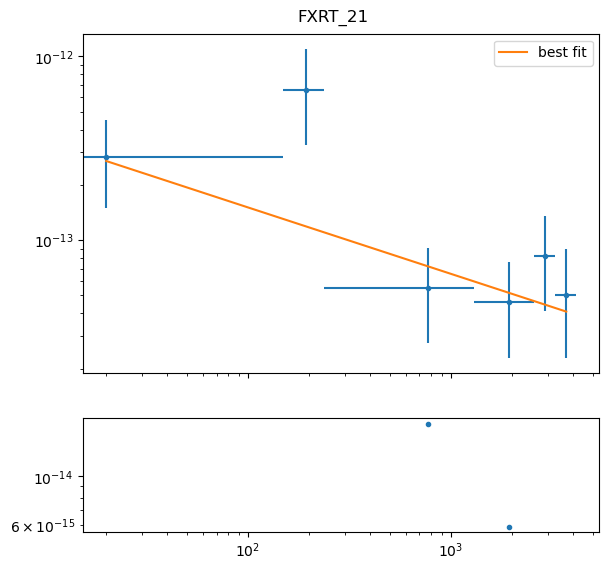

20.0 257.566325545311 0


name,value,standard error,relative error,initial value,min,max,vary
alpha_1,0.36133576,0.12324632,(34.11%),0.4,-1.00000000,5.00000000,True
amplitude,7.9545e-13,6.4458e-13,(81.03%),1.1e-12,1.0000e-14,1.0000e-10,True


In [13]:
i=20
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("alpha_1", min = -1, max = 5.0, value = jonathan_params[0])
params.add("amplitude", min = 1e-14, max = 1e-10, value = jonathan_params[1])


minner = lm.Minimizer(cost_func_pl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
alp1 = bfit["alpha_1"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = power_law(time, result.params['alpha_1'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[0], time[-1])
y = power_law(x, result.params['alpha_1'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

### FXRT 22, i=21

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 103
    # data points      = 29
    # variables        = 4
    chi-square         = 2.93115658
    reduced chi-square = 0.11724626
    Akaike info crit   = -58.4650637
    Bayesian info crit = -52.9958804
[[Variables]]
    t_break:    4549.37229 +/- 290.834644 (6.39%) (init = 4400)
    alpha_1:    0.16060885 +/- 0.05818061 (36.23%) (init = 0.2)
    alpha_2:    6.07132493 +/- 2.37043862 (39.04%) (init = 3.8)
    amplitude:  3.2093e-13 +/- 3.5949e-14 (11.20%) (init = 3.2e-13)
[[Correlations]] (unreported correlations are < 0.100)
    C(t_break, alpha_2)   = +0.7751
    C(alpha_1, amplitude) = -0.7005
    C(t_break, amplitude) = -0.4007
    C(t_break, alpha_1)   = +0.2248


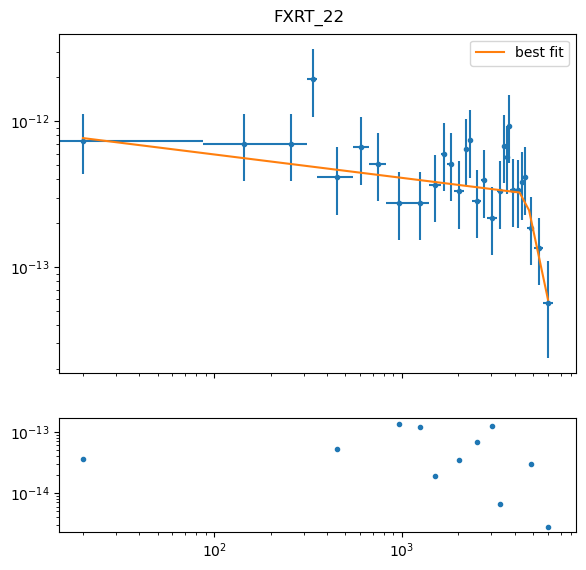

20.0 135.06414830684662 0


name,value,standard error,relative error,initial value,min,max,vary
t_break,4549.37229,290.834644,(6.39%),4400.0,1000.00000,10000.0000,True
alpha_1,0.16060885,0.05818061,(36.23%),0.2,-5.00000000,5.00000000,True
alpha_2,6.07132493,2.37043862,(39.04%),3.8,0.00000000,10.0000000,True
amplitude,3.2093e-13,3.5949e-14,(11.20%),3.2e-13,1.0000e-14,1.0000e-11,True


In [14]:
i=21
time,flux,time_low,time_high,flux_low,flux_high=np.loadtxt(folder+FXRTs[i]+filename, unpack=True)
flux_err = flux_high + flux_low
time_err = time_high + time_low

fit_index = 0
params=lm.Parameters()
jonathan_params = jonathan_fits[FXRTs[i]]
params.add("t_break", min = 1e3, max = 1e4, value = jonathan_params[0])
params.add("alpha_1", min = -5, max = 5.0, value = jonathan_params[1])
params.add("alpha_2", min = 0, max = 10.0, value = jonathan_params[2])
params.add("amplitude", min = 1e-14, max = 1e-11, value = jonathan_params[3])


minner = lm.Minimizer(cost_func_bpl, params, fcn_args=(time[fit_index:], flux[fit_index:], time_err[fit_index:], flux_err[fit_index:]))
result = minner.minimize(method="least_squares")

bfit = result.params
tb = bfit["t_break"].value
alp1 = bfit["alpha_1"].value
alp2 = bfit["alpha_2"].value
amp = bfit["amplitude"].value

lm.printfuncs.report_fit(result)

residuals = broken_power_law(time, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value) - flux
x=np.geomspace(time[fit_index], time[-1])
y = broken_power_law(x, result.params['t_break'].value, result.params['alpha_1'].value, result.params['alpha_2'].value, result.params['amplitude'].value)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y, label ='best fit', zorder=10)
# ax1.loglog(x, broken_power_law(x, *jonathan_fits[FXRTs[i]]), label ='Quirola et al', zorder=10)
ax1.legend()
ax2.loglog(time,residuals, '.')

plt.subplots_adjust(top=0.94)
plt.suptitle(FXRTs[i])
plt.show()

refit_params[FXRTs[i]] = result.params.valuesdict()
refit_params[FXRTs[i]].update({param.name+"_err": param.stderr for param in result.params.values()})
refit_params[FXRTs[i]].update({"time_plt_start":time[fit_index]})
refit_params[FXRTs[i]].update({"time_plt_start_err":time_err[fit_index]})


print(time[fit_index], time_err[fit_index], fit_index)

result.params

In [17]:
df = pd.read_csv('fxrt_refit_parameters.csv')
df_refit_params = pd.DataFrame.from_dict(refit_params, orient='index')
df_refit_params.reset_index(inplace=True)
df_refit_params.rename(columns={'index':'FXRT_Name'}, inplace=True)
df_refit_params = pd.concat([df, df_refit_params], ignore_index=True)
df_refit_params.to_csv('fxrt_refit_parameters.csv', index=False)
df_refit_params

,FXRT_Name,t_break,alpha_1,alpha_2,amplitude,t_break_err,alpha_1_err,alpha_2_err,amplitude_err,time_plt_start,time_plt_start_err
0,FXRT_1,118.150021,0.011872,3.970058,9.198882e-11,2.340221e+00,5.584292e-02,0.165159,3.992260e-12,20.0,3.240960
1,FXRT_2,5887.509038,0.040159,1.650922,3.568257e-14,1.567862e+03,9.653554e-02,0.422766,9.391608e-15,20.0,1124.626554
2,FXRT_3,1008.210786,-0.197294,0.824533,2.515951e-14,1.009035e+10,2.608700e+06,0.210260,2.076181e-07,20.0,2186.142284
3,FXRT_4,13917.633705,-0.314394,1.493324,1.362612e-14,5.781850e+03,8.487586e-02,3.647041,3.457659e-15,20.0,15148.463272
4,FXRT_5,8000.000000,-1.000000,10.000000,5.809633e-14,NaN,NaN,NaN,NaN,20.0,14185.929190
5,FXRT_7,1114.081974,-0.220857,1.552391,1.364094e-12,1.019265e+02,8.479733e-02,0.102343,1.386166e-13,20.0,139.363016
6,FXRT_8,23753.574788,-0.189603,2.028858,5.556993e-15,3.280668e+03,3.010800e-02,1.080075,5.532907e-16,20.0,18940.237334
7,FXRT_9,4782.651809,-2.499760,4.288560,4.199941e-14,8.020776e+02,1.916600e+00,2.900801,2.080413e-14,20.0,3584.547946
8,FXRT_10,2708.695218,0.001068,2.392370,1.955692e-14,5.349250e+02,9.334786e-02,0.616370,4.294969e-15,20.0,637.622803
9,FXRT_11,950.036846,-1.468065,28.770521,3.646904e-11,NaN,NaN,3.490656,NaN,20.0,411.471361
